In [57]:
from bs4 import BeautifulSoup
import requests
url = BeautifulSoup('https://www.sharesansar.com/live-trading', 'html.parser')
soup = requests.get(url)
soup

<ipython-input-57-b148caab732a>:3: MarkupResemblesLocatorWarning:

The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.



<Response [200]>

In [58]:
soup = BeautifulSoup(soup.text,'lxml')
soup.table

<table class="table table-bordered table-striped table-hover dataTable compact" id="headFixed">
<thead>
<tr>
<th width="10px">S.No</th>
<th>Symbol</th>
<th class="text-center">LTP</th>
<th class="text-center">Point Change</th>
<th class="text-center">% Change</th>
<th class="text-center">Open</th>
<th class="text-center">High</th>
<th class="text-center">Low</th>
<th class="text-center">Volume</th>
<th class="text-center">Prev. Close</th>
</tr>
</thead>
<tbody>
<tr>
<td class="danger-index">
                                        1</td>
<td class="danger-index">
<a href="https://www.sharesansar.com/company/aclbsl" title="ACLBSL">ACLBSL</a>
</td>
<td class="text-center danger-index">
                                        955.00</td>
<td class="text-center danger-index">
                                        -15.00</td>
<td class="text-center danger-index">
                                        -1.55</td>
<td class="text-center danger-index">
                                      

In [59]:

# all_data =[]
# heading = soup.find_all('tr')

# for data in heading:
#   i = data.text.strip()
#   all_data.append(i)
alldata = []  # initialize empty list
column = soup.find_all('tr') # find all tr tags and assign to column
for rows in column:  # iterate through all tr tag
  row_data = rows.find_all(['th','td'])    # finding out th and td at the same time
  rowlist =[]  # it store the data
  for item in row_data: # iterate through all th and td tag
    y = item.text.strip()  # strip the data
    rowlist.append(y)    # append the data in empty list
  alldata.append(rowlist) # append all the data of td and th to rowlist

for rows in alldata:   # print all extracted data
  print(rows)


['S.No', 'Symbol', 'LTP', 'Point Change', '% Change', 'Open', 'High', 'Low', 'Volume', 'Prev. Close']
['1', 'ACLBSL', '955.00', '-15.00', '-1.55', '989.00', '989.00', '951.00', '7,738.00', '970.00']
['2', 'ADBL', '260.00', '-1.00', '-0.38', '258.10', '287.10', '258.00', '22,427.00', '261.00']
['3', 'AHL', '508.00', '8.00', '1.60', '505.00', '525.30', '500.00', '19,648.00', '500.00']
['4', 'AHPC', '153.30', '-1.60', '-1.03', '155.00', '155.80', '153.00', '119,668.00', '154.90']
['5', 'AKJCL', '210.00', '-2.00', '-0.94', '215.10', '216.20', '208.00', '55,957.00', '212.00']
['6', 'AKPL', '162.50', '-1.00', '-0.61', '164.00', '164.50', '161.80', '53,584.00', '163.50']
['7', 'ALBSL', '953.00', '-13.40', '-1.39', '960.00', '975.00', '951.00', '5,506.00', '966.40']
['8', 'ALICL', '560.00', '-2.00', '-0.36', '551.00', '566.00', '551.00', '16,936.00', '562.00']
['9', 'ANLB', '2,400.00', '-100.00', '-4.00', '2,450.00', '2,497.00', '2,382.00', '1,517.00', '2,500.00']
['10', 'API', '169.80', '0.80

In [60]:
import csv
file = open('nepse.csv','w')
x = csv.writer(file)
x.writerows(alldata)
file.close()

In [61]:
import pandas as pd
df = pd.read_csv('nepse.csv', index_col = 'S.No')
df

,Symbol,LTP,Point Change,% Change,Open,High,Low,Volume,Prev. Close
S.No,,,,,,,,,
1,ACLBSL,955.00,-15.0,-1.55,989.00,989.00,951.00,"7,738.00",970.00
2,ADBL,260.00,-1.0,-0.38,258.10,287.10,258.00,"22,427.00",261.00
3,AHL,508.00,8.0,1.60,505.00,525.30,500.00,"19,648.00",500.00
4,AHPC,153.30,-1.6,-1.03,155.00,155.80,153.00,"119,668.00",154.90
5,AKJCL,210.00,-2.0,-0.94,215.10,216.20,208.00,"55,957.00",212.00
...,...,...,...,...,...,...,...,...,...
313,USHL,547.00,-2.0,-0.36,551.00,555.90,541.60,"3,738.00",549.00
314,USLB,"1,685.00",-74.0,-4.21,"1,740.00","1,740.00","1,681.00","10,682.00","1,759.00"
315,VLBS,982.10,-23.9,-2.38,"1,007.10","1,018.00",982.10,"6,471.00","1,006.00"


In [62]:
#df = df[0:10]

In [63]:
df['Volume'] = df['Volume'].str.replace(',', '').astype(float) # removing commas

In [64]:
sorted_df = df.sort_values(by = "Volume",ascending = False)  # sorting the datafram by volume
sorted_df

,Symbol,LTP,Point Change,% Change,Open,High,Low,Volume,Prev. Close
S.No,,,,,,,,,
229,RLFL,445.50,40.5,10.00,401.00,445.50,400.30,309443.0,405.00
208,PFL,662.90,43.1,6.95,632.10,663.00,627.00,265347.0,619.80
216,PROFL,427.10,26.1,6.51,409.00,431.00,404.00,230820.0,401.00
255,SFCL,464.00,29.5,6.79,437.00,465.00,437.00,214946.0,434.50
128,MEN,600.00,-9.9,-1.62,609.00,619.90,598.00,182838.0,609.90
...,...,...,...,...,...,...,...,...,...
184,NIMBD90,"1,039.80",-20.2,-2.00,"1,039.80","1,039.80","1,039.80",25.0,"1,061.00"
26,CBLD88,"1,045.00",-5.0,-0.48,"1,045.00","1,045.00","1,045.00",25.0,"1,050.00"
204,PBD88,"1,040.10",-4.9,-0.47,"1,040.10","1,040.10","1,040.10",25.0,"1,045.00"


In [65]:
import plotly.express as px # plot data with symbol and its volume
fig = px.bar(sorted_df[0:10], x= 'Symbol', y='Volume')
fig.show()


In [66]:

import plotly.express as px # plot data with last transaction price wrt symbol
fig = px.histogram(sorted_df[0:10], x="Symbol", y="LTP", height = 500)

fig.show()

In [67]:
print(df.columns)

Index(['Symbol', 'LTP', 'Point Change', '% Change', 'Open', 'High', 'Low',
       'Volume', 'Prev. Close'],
      dtype='object')


In [75]:
df = df.iloc[:10]

In [92]:
#plot open and close data of random 10 variables
import plotly.graph_objects as go    #sorting symbols interms of open and close price
Open = [float(i.replace(',','')) for i in df['Open']]
Close = [float(i.replace(',','')) for i in df['Prev. Close']]
Symbol = df['Symbol']
fig = go.Figure(data=[
    go.Bar(name='Open', x=Symbol, y=Open),
    go.Bar(name='Close', x=Symbol, y=Close)
])
# Change the bar mode
fig.update_layout(barmode='group',title = "Comparasion of open and close prices",xaxis_title ="Symbols",yaxis_title = "prices")
fig.show()

In [93]:
#plot high and low price data of random 10 variables
import plotly.graph_objects as go
High = [float(i.replace(',','')) for i in df['High']]
Low = [float(i.replace(',','')) for i in df['Low']]
Symbol = df['Symbol']
fig = go.Figure(data=[
    go.Bar(name='High', x=Symbol, y=High),
    go.Bar(name='Low', x=Symbol, y=Low)
])
# Change the bar mode
fig.update_layout(barmode='group',title = "Comparasion of high and low prices",xaxis_title ="Symbols",yaxis_title = "prices")
fig.show()

In [94]:
# plotting the relationship between symbol and last trading price
import plotly.graph_objects as go
fig = go.Figure([go.Bar(x=Symbol, y=LTP)])

fig.show()

In [97]:
import plotly.graph_objects as go
import pandas as pd

fig = go.Figure(data=[go.Candlestick(x=df['Symbol'],
              open=df['Open'], high=df['High'],
                low=df['Low'], close=df['Prev. Close'])
                     ])

fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

#through this we can find open,close, high and low price of the stock

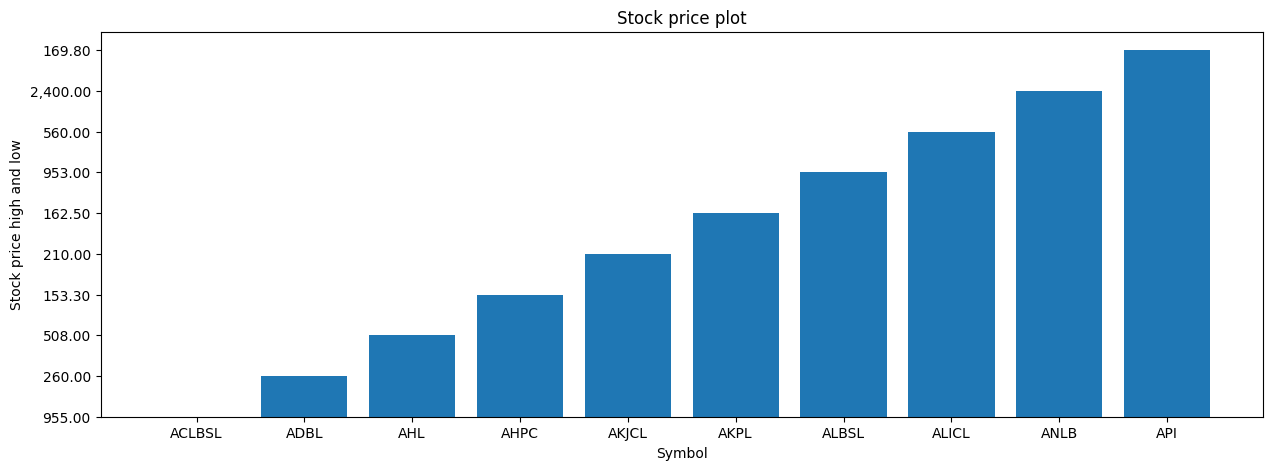

In [104]:
#sorting the dataframe high and low variable
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.bar(df['Symbol'].head(10),df['LTP'].head(10))
plt.title('Stock price plot')
plt.xlabel('Symbol')
plt.ylabel('Stock price high and low')
plt.xticks()
plt.show()

In [126]:
#Sort the DataFrame by the 'Low' column in ascending order
sorted_df = df.sort_values(by='Low',ascending = True)
print(sorted_df)



      Symbol       LTP  Point Change  % Change      Open      High     Low  \
S.No                                                                         
4       AHPC    153.30          -1.6     -1.03    155.00    155.80   153.0   
6       AKPL    162.50          -1.0     -0.61    164.00    164.50   161.8   
10       API    169.80           0.8      0.47    168.60    171.00   168.0   
5      AKJCL    210.00          -2.0     -0.94    215.10    216.20   208.0   
2       ADBL    260.00          -1.0     -0.38    258.10    287.10   258.0   
3        AHL    508.00           8.0      1.60    505.00    525.30   500.0   
8      ALICL    560.00          -2.0     -0.36    551.00    566.00   551.0   
1     ACLBSL    955.00         -15.0     -1.55    989.00    989.00   951.0   
7      ALBSL    953.00         -13.4     -1.39    960.00    975.00   951.0   
9       ANLB  2,400.00        -100.0     -4.00  2,450.00  2,497.00  2382.0   

        Volume Prev. Close  
S.No                        
4    

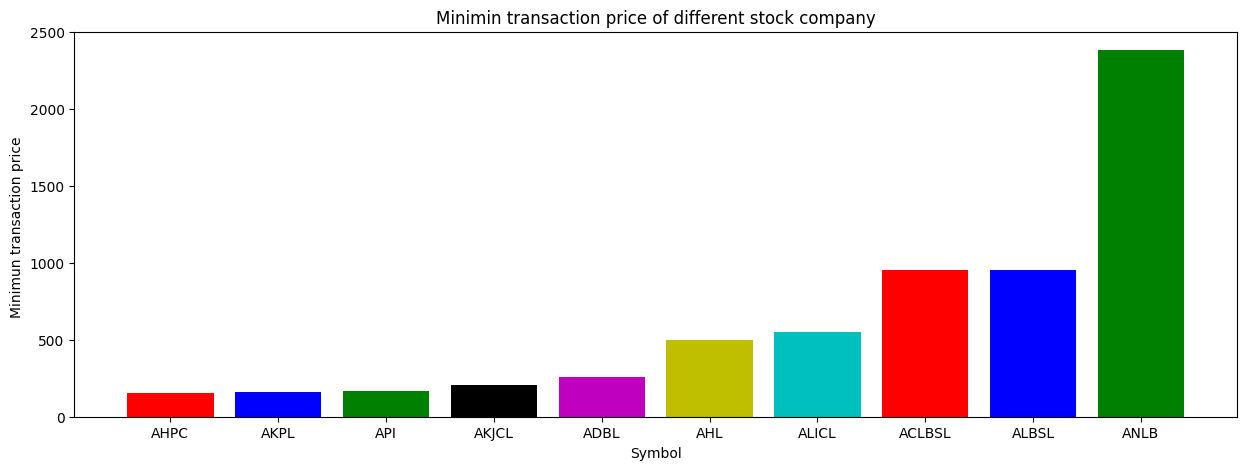

In [128]:

# plot the data interms of minimum price transaction

plt.figure(figsize=(15,5))
x = sorted_df['Symbol']
y = sorted_df['Low']
plt.bar(x,y, color = ['r','b','g','k','m','y','c'])
plt.xlabel('Symbol')
plt.ylabel('Minimun transaction price ')
plt.title('Minimin transaction price of different stock company')
plt.plot()
plt.show()